In [3]:
%%bash
mkdir -p data
wget https://pjreddie.com/media/files/yolov3.weights -P data
wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -P data
wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -P data

--2020-10-24 11:10:59--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   868KB/s    in 4m 37s  

2020-10-24 11:15:36 (875 KB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]

--2020-10-24 16:46:33--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘data/yolov3.cfg’

     0K ........                                     

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading weights and config
net = cv2.dnn.readNet("data/yolov3.weights", "data/yolov3.cfg")
classes = []
with open("data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [3]:
# Loading image
img = cv2.imread("images/yolo-opencv-input.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [4]:
# Detecting objects - forward prop
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

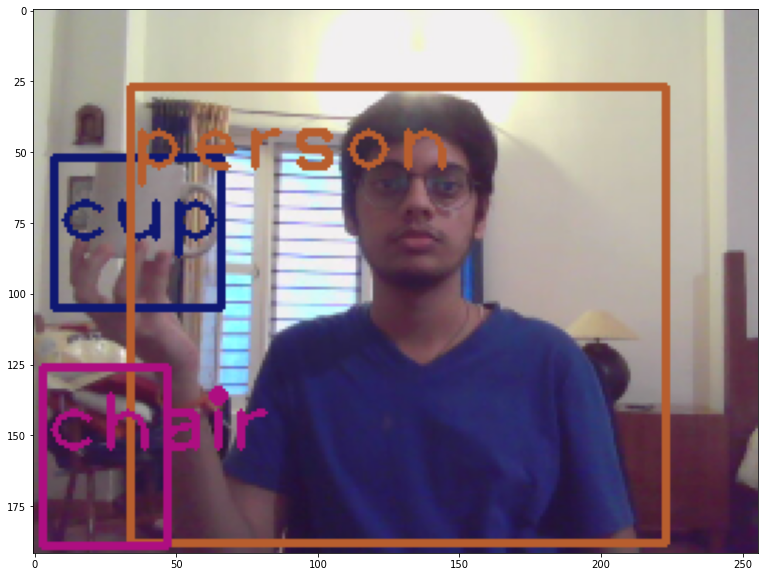

In [5]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 2, color, 2)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img)